# Installation and setup

## Putting R on your path

Using ML-TDAExplore is most convenient when `Rscript` is on your PATH so can be called via `Rscript` on Unix-alikes or `Rscript.exe` on Windows. 

On Windows you'll have to do this through the environment variable editor. Here's CRAN's guide: https://cran.r-project.org/bin/windows/base/rw-FAQ.html#Rcmd-is-not-found-in-my-PATH_0021


## Run the included install script

The included script `install.R` installs ML-TDAE's dependencies and in particular the R package [TDAExplore](https://github.com/P-Edwards/TDAExplore). It will also set permissions so that `ml-tda` and `convolve-tda` are both executable.

It's easiest to run the script either in `R` via the command line or in Rstudio. You will need to run as administrator if you want the executables available 
system-wide.

Either way, make sure your working directory is this project's root, run `source("install.R")`, and follow the prompts. This manual assumes the executables are available on your PATH, but they work perfectly well from any other location.



# Example data

The data for the examples is large, so it isn't stored in the repository. You can download it [here](https://drive.google.com/drive/folders/1LJSaqZTr9eVa8DcO65XQyPKtIQiy0w_D?usp=sharing). Place it in this project's root directory if you want to follow along.

# Example 1: Train an SVM with persistence landscapes

The command line program `ml-tda` can be pointed at folders containing images and will train a machine learning classifier to tell them apart. As part of its input we have to provide a CSV file with folder names and labels. The included `parameters_template.csv` is set up for this first example. Feel free to open it in your favorite spreadsheet viewer.

In [3]:
csvtool readable parameters_template.csv

experiment_name image_directories   directory_classes radius_of_patches data_results_directory
inner_vs_outer  example_data/inners Inner             75                results_rdata
                example_data/outers Outer                               


The columns must be named as shown, though their order does not matter. A quick primer on the parameters: 

* `experiment_name` will be used to name the output files
* `image_directories` are the folders with the images 
* `directory_classes` specifies the class label for images in each folder
* `data_results_directory` is where .RData results will be saved

Note that the directory paths may be relative to the execution directory, or they can be absolute file paths on the file system. Now let's run this example. We'll instruct `ml-tda` extract summaries from the images, perform 5-fold cross validation using linear support vector machines, and save some plots summarizing the results. Set --cores to however many cores you're willing to commit. The command will produce some output as it progresses.

In [2]:
ml-tda --parameters parameters_template.csv --cores 8 --svm TRUE --plot TRUE

starting worker pid=49381 on localhost:11315 at 23:16:56.464
starting worker pid=49395 on localhost:11315 at 23:16:56.703
starting worker pid=49409 on localhost:11315 at 23:16:56.944
starting worker pid=49423 on localhost:11315 at 23:16:57.183
starting worker pid=49437 on localhost:11315 at 23:16:57.413
starting worker pid=49451 on localhost:11315 at 23:16:57.642
starting worker pid=49465 on localhost:11315 at 23:16:57.885
starting worker pid=49479 on localhost:11315 at 23:16:58.123
Loading required package: TDAExplore
Loading required package: TDAExplore
Loading required package: TDAExplore
Loading required package: TDAExplore
Loading required package: TDAExplore
Loading required package: TDAExplore
Loading required package: TDAExplore
Loading required package: TDAExplore
loaded TDAExplore and set parent environment
loaded TDAExplore and set parent environment
loaded TDAExplore and set parent environment
loaded TDAExplore and set parent environment
loaded TDAExplore and set parent env

The plots were saved in the default location, `./tda-explore-plots`. For instance, every image was a testing image for one of the classifiers we trained and wasn't in the training data for that classifier. So all 10 images were given a predicted label. Let's see how many images the method got right. A plot with stem name `confusion_matrix.svg` was saved recording that information.

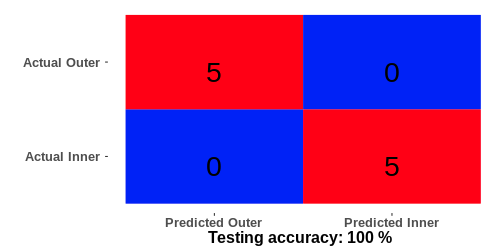


If you want to manipulate the results yourself in an R or RStudio session, a `.RData` file was saved in the folder `results_rdata`. You can run `?TDAExplore::TDAExplore` for more information about what the file stores.

### Convolving images

The command line app `convolve-tda` allows you to take a trained SVM like the one just computed with `ml-tda` and use it to "paint" a mask onto the image showing how strongly the classifier thinks each part looks like one of the training classes. Since this example's classifier is trained to try to tell the inside of a cell from the outside, let's apply it to whole cells. First, note that both `ml-tda` and `convolve-tda` output help text if you pass the flag `--help`

In [4]:
convolve-tda --help

Usage: /usr/local/bin/convolve_images.R [options]


Options:
	--training=TRAINING
		Path to pretrained machine learning results.

	--image=IMAGE
		Path to a single image file to convolve.

	--folders=FOLDERS
		Comma separated list of directories containing folders to convolve

	--list=LIST
		Path to single column .csv file listing paths to images.

	--centersfolders=CENTERSFOLDERS
		Comma separated list of directories containing images from which to sample patch centers in convolution.

	--centerslist=CENTERSLIST
		Path to single column .csv file listing paths to images for centers.

	--directory=DIRECTORY
		Path to directory where results should be saved. Default is ./tda-explore-convolutions.

	--name=NAME
		Base name for saved images. Default is name stem from training RData file.

	--svm=SVM
		If non-0, convolves images using SVM classifier.

	--tsne=TSNE
		If non-0, convolves images using TSNE scores from input images.

	--patches=PATCHES
		Number of patches to use per image. Defa

In [1]:
convolve-tda \
--training \
results_rdata/inner_vs_outer372patches_75radius_Feb-10-1613017016_ML_results_and_summaries.RData \
--folders example_data/whole \
--svm TRUE \
--cores 8 \
--separate 1

Warning messages:
1: Removed 94 rows containing non-finite values (stat_bin). 
2: Removed 244 rows containing missing values (geom_bar). 
3: Removed 47 rows containing non-finite values (stat_bin). 
4: Removed 274 rows containing missing values (geom_bar). 
5: Removed 143 rows containing non-finite values (stat_bin). 
6: Removed 262 rows containing missing values (geom_bar). 
7: Removed 39 rows containing non-finite values (stat_bin). 
8: Removed 284 rows containing missing values (geom_bar). 
9: Removed 79 rows containing non-finite values (stat_bin). 
10: Removed 250 rows containing missing values (geom_bar). 


Here's one of the 5 mask images and a histogram of the scores the classifier assigned to the patches it extracted.

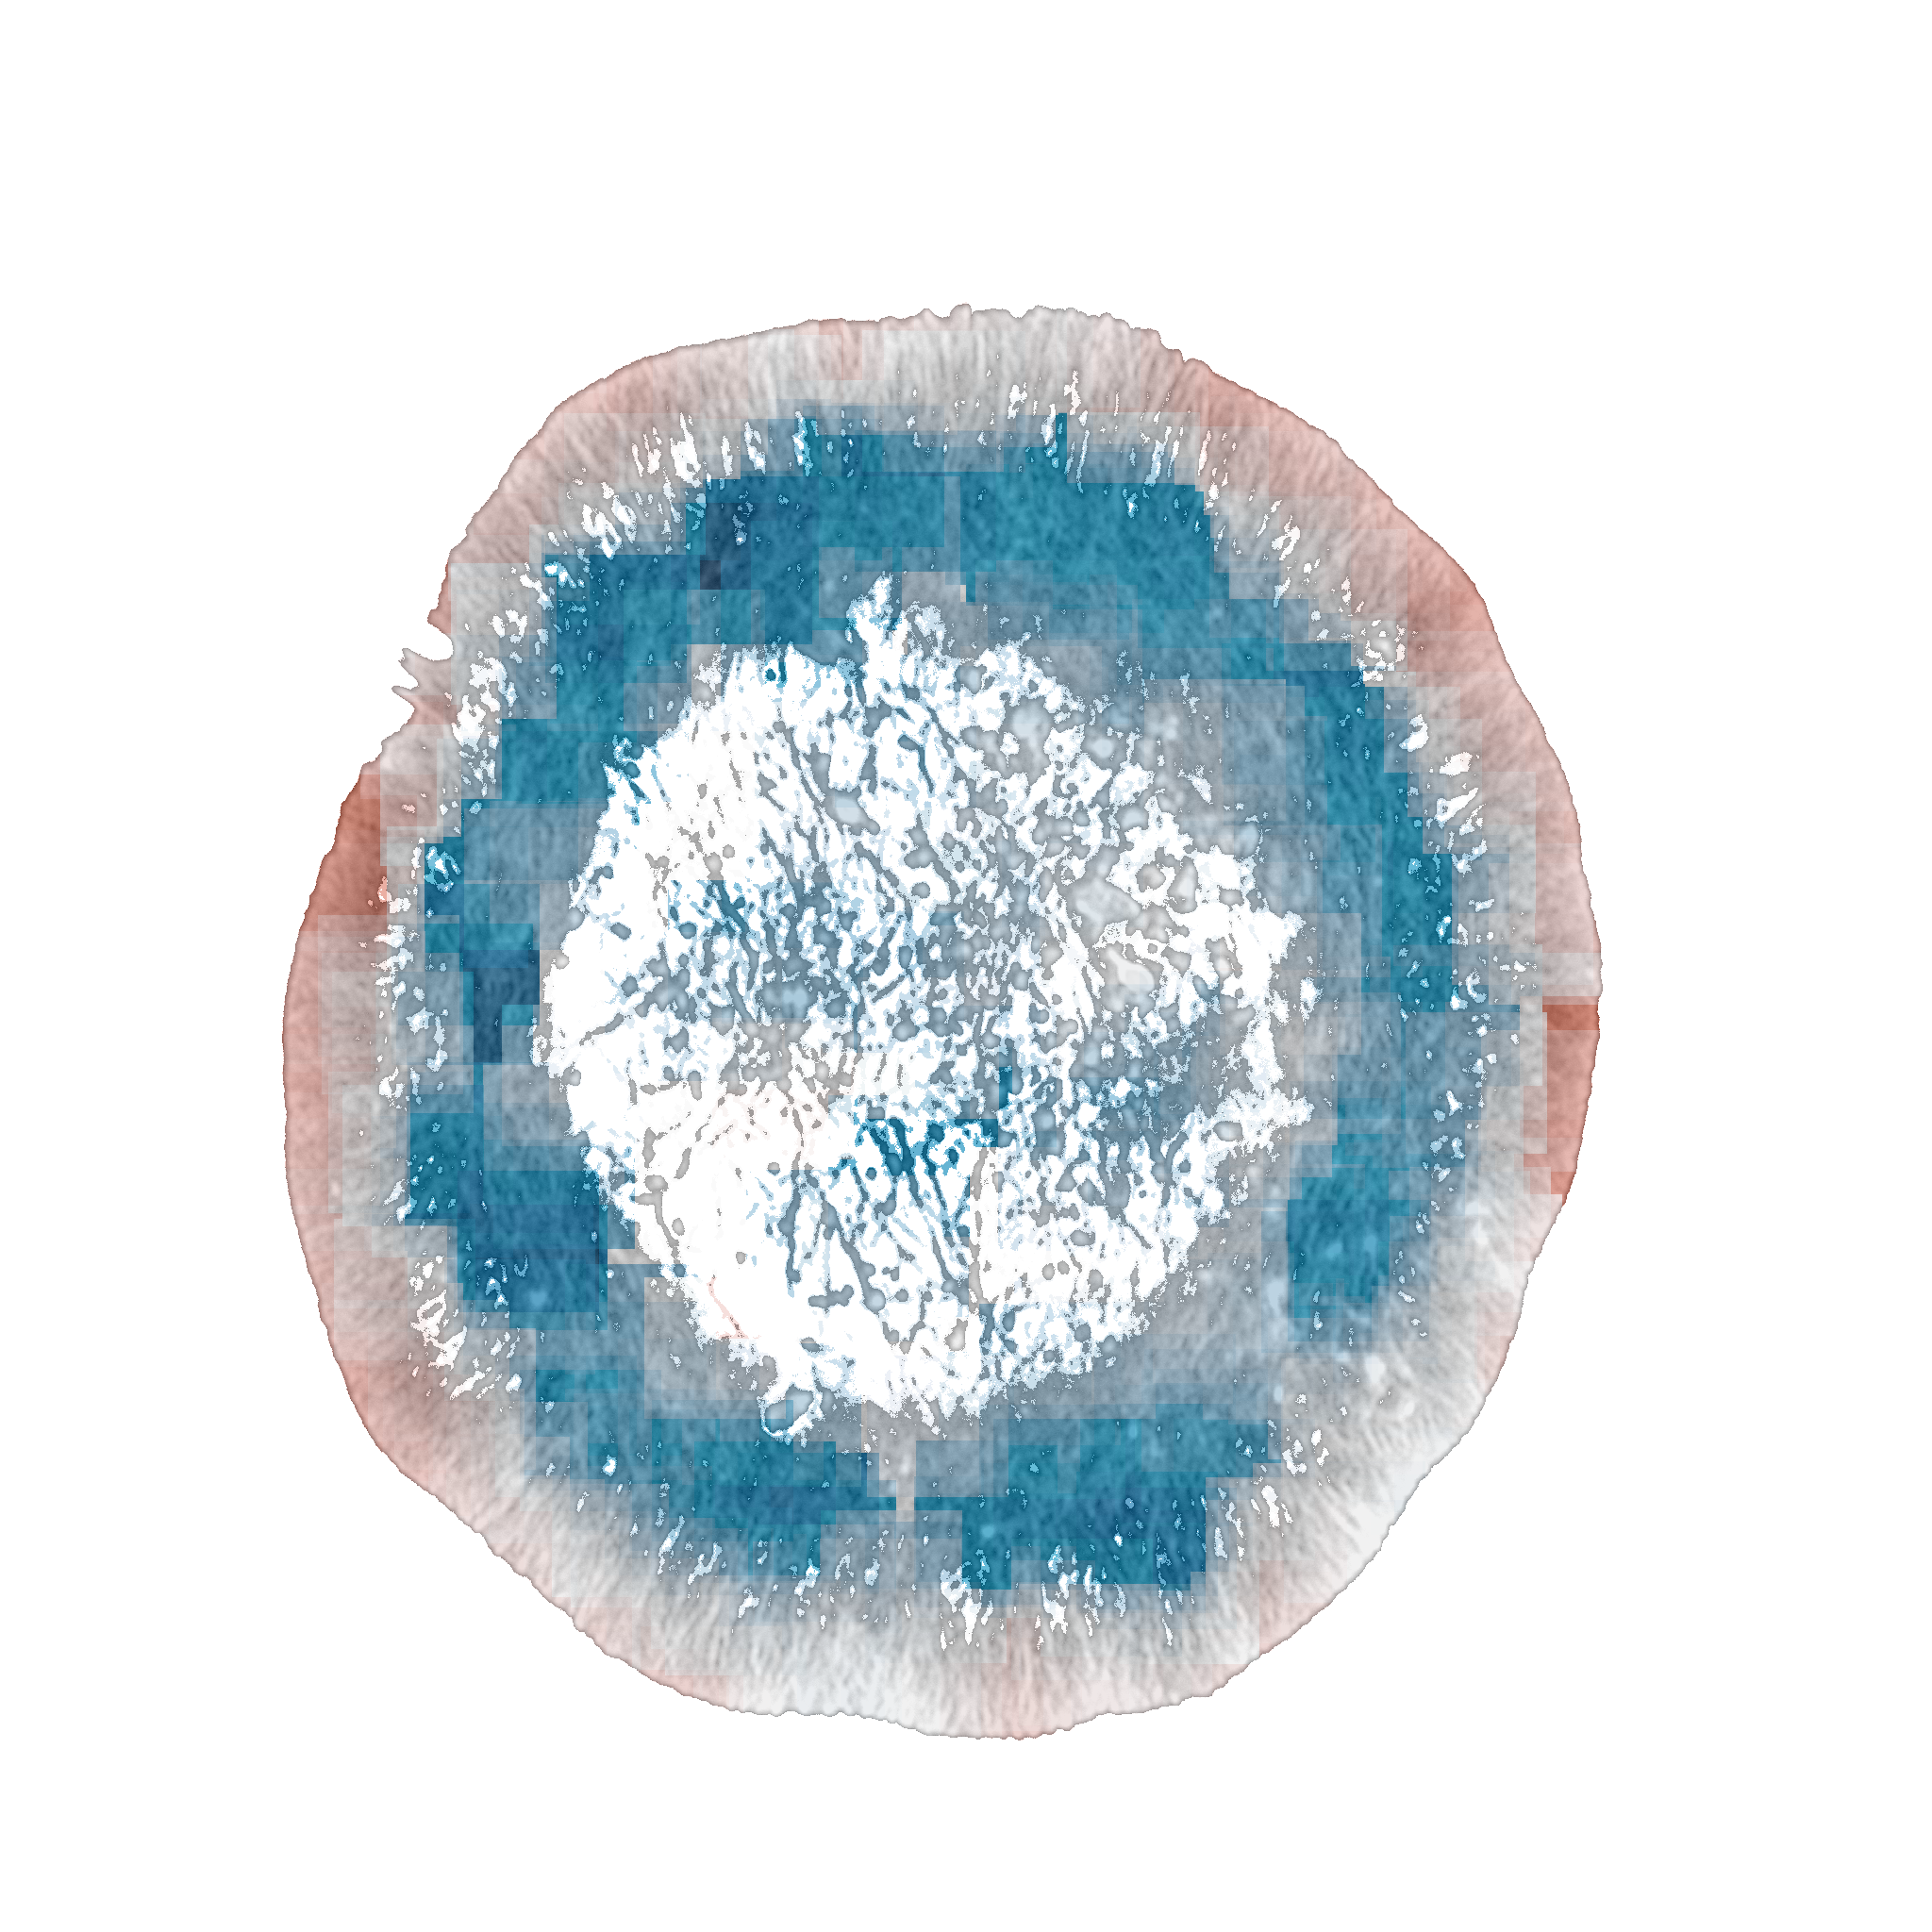


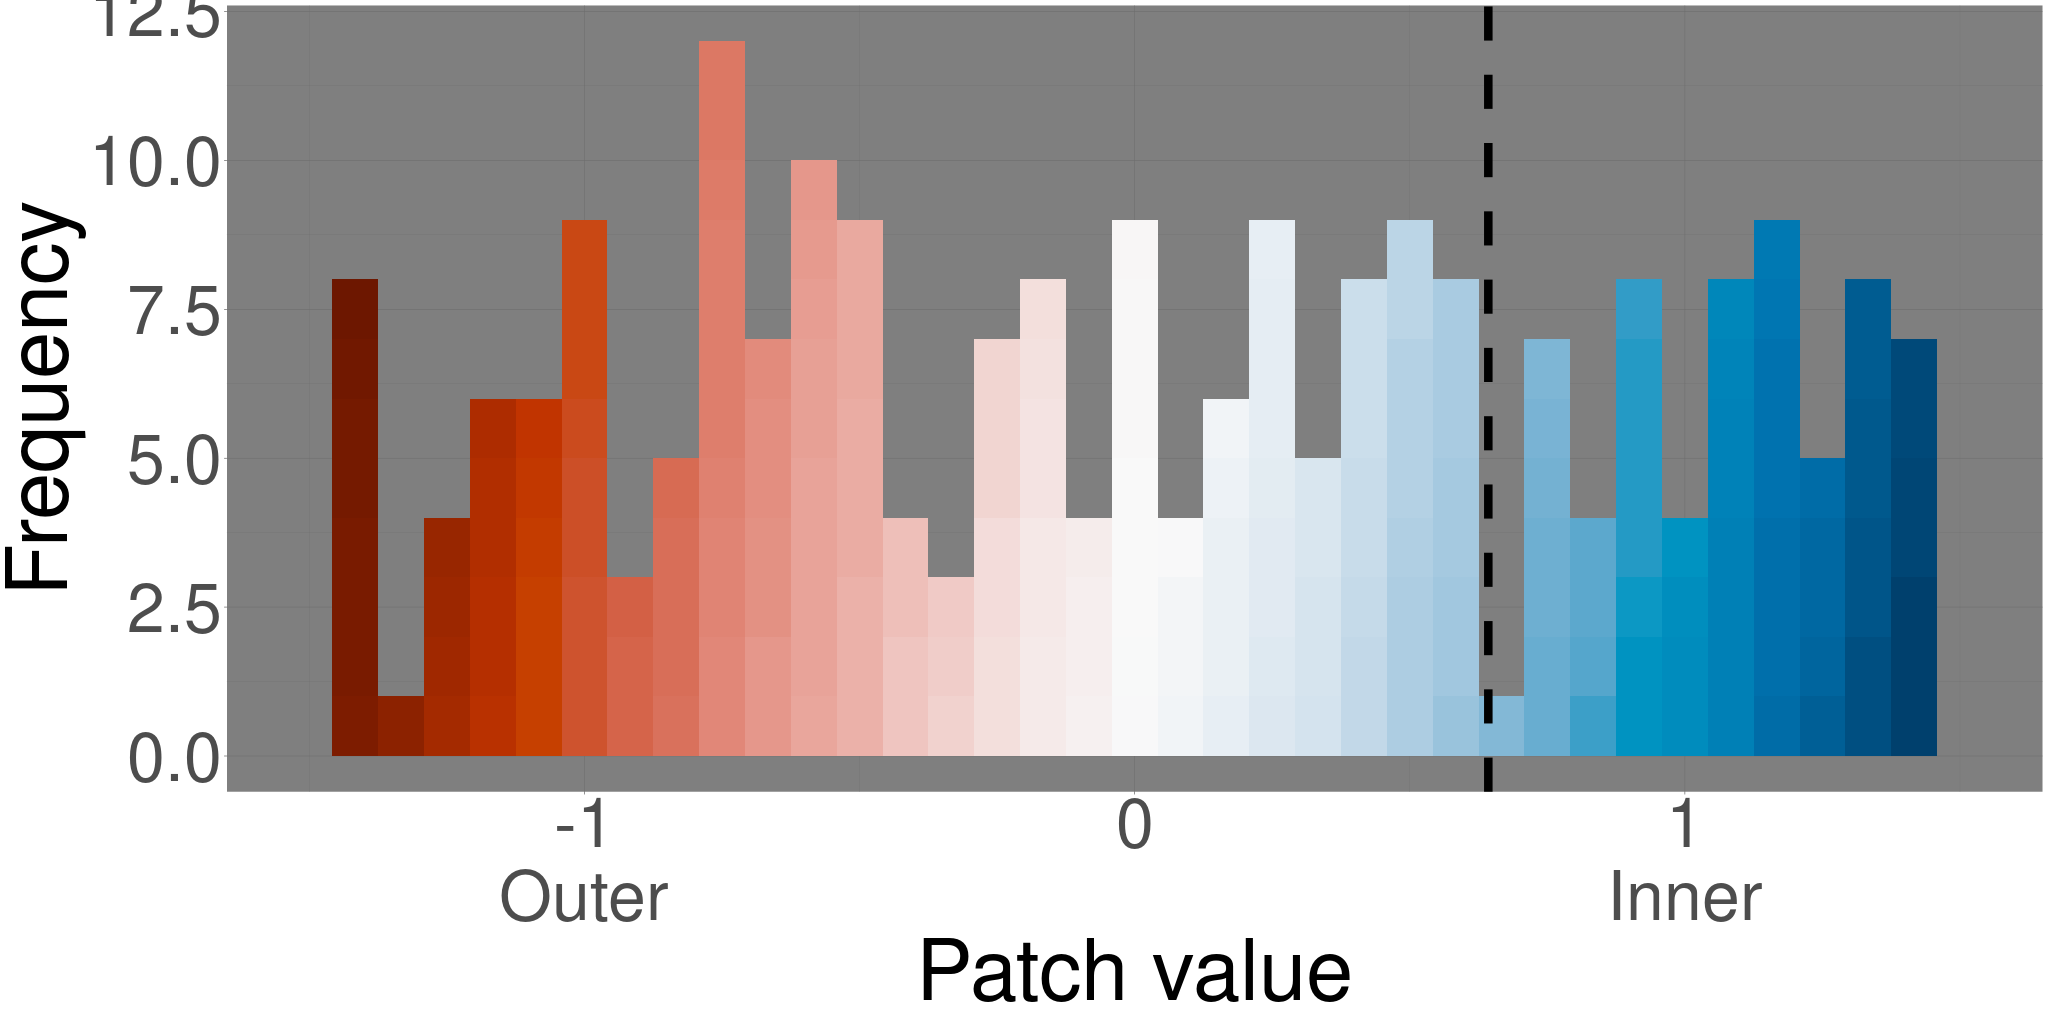
